<a href="https://colab.research.google.com/github/mcash8/Info-Theory-Project/blob/main/information_plane_CNN/plot_MI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall tensorflow

In [ ]:
!pip install tensorflow==1.13.2

In [24]:
!pip install pandas

     |████████████████████████████████| 11.3 MB 4.0 MB/s 


In [ ]:
!python main.py

In [1]:
import numpy as np
a = np.load('mi_all.npy')
print(a.shape)


(23, 2, 112, 4)


In [ ]:
mi_xt_mean = np.mean(a,0)[0]
mi_ty_mean = np.mean(a,0)[1]
#mi_xt_mean = a[0,0,:,:]
#mi_ty_mean = a[0,1,:,:]
print(mi_xt_mean.shape)
print(mi_xt_mean)
print(mi_ty_mean)

In [3]:
IXM_N = mi_xt_mean[0,:]
IYM_N = mi_ty_mean[0,:]

T =1

for i in range(1,mi_xt_mean.shape[0]):
    
    A_ = i <= 4 and i % 1 == 0  
    A0 = i > 4 and i <= 10 and i % 2 == 0    
    A1 = i > 10 and i <= 30 and i % 3 == 0     
    A2 = i > 30 and i % 3 == 0    

    #if A0 or A1 or A2:
    if  A0 or A1 or A2:
        mean_vec_xt = np.mean(mi_xt_mean[T:i+1,:],axis=0)
        mean_vec_yt = np.mean(mi_ty_mean[T:i+1,:],axis=0)  
                             
        #print(T,i+1)                      
        IXM_N = np.append(IXM_N,mean_vec_xt)
        IYM_N = np.append(IYM_N,mean_vec_yt)
        
        T = i+1

        
IXM_N = np.reshape(IXM_N,(-1,4))
IYM_N = np.reshape(IYM_N,(-1,4))
print(IXM_N.shape)

(38, 4)


In [4]:
print(a[-2,1,-1,-1])

3.2287541301857177


In [ ]:
#mi_ty_mean[0:10,3]=np.array(mi_ty_mean[0:10,3])
IXM_N, IYM_N = mi_ty_mean, mi_ty_mean
print(IXM_N.shape)
print(IYM_N.shape)

In [39]:
import pandas as pd
T=3
IXM_N, IYM_N = np.zeros((mi_xt_mean.shape[0]-T+1,4)), np.zeros((mi_ty_mean.shape[0]-T+1,4))



for i in range(4):
    df_xt = pd.DataFrame(mi_xt_mean[:,i], columns=['bleh'])
    df_yt = pd.DataFrame(mi_ty_mean[:,i], columns=['bleh'])
    IXM_N[:,i] = df_xt['bleh'].rolling(T).mean()[T-1:]
    IYM_N[:,i] = df_yt['bleh'].rolling(T).mean()[T-1:]
    
    #IXM_N[:,i]=pd.rolling_mean(mi_xt_mean[:,i],T)[T-1:]
    #IYM_N[:,i]=pd.rolling_mean(mi_ty_mean[:,i],T)[T-1:]
    
print(IXM_N.shape)
print(IYM_N.shape)

(110, 4)
(110, 4)


<Figure size 576x576 with 0 Axes>

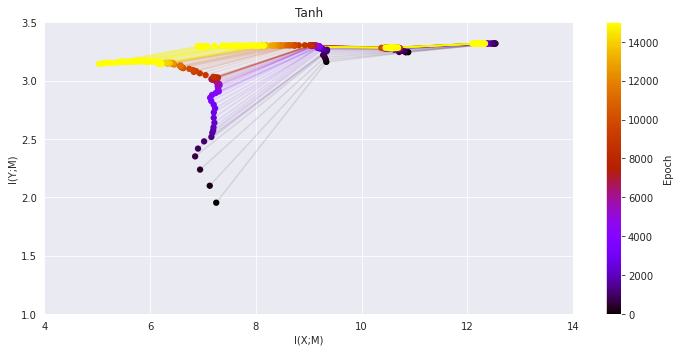

In [44]:
# Plot like Tishby

#matplotlib inline
import matplotlib
#%matplotlib tk
#matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('darkgrid')


plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(4,2)
#for actndx, (activation, vals) in enumerate(measures.items()):
#    epochs = sorted(vals.keys())
#    if not len(epochs):
#        continue

COLORBAR_MAX_EPOCHS=15000

plt.tight_layout()        

fig=plt.figure(figsize=(10,5))

#max_epoch = max( (max(vals.keys()) if len(vals) else 0) for vals in measures.values())
sm = plt.cm.ScalarMappable(cmap='gnuplot', norm=plt.Normalize(vmin=0, vmax=COLORBAR_MAX_EPOCHS))
sm._A = []

#fig=plt.figure(figsize=(10,5))
#for actndx, (activation, vals) in enumerate(measures.items()):
#    epochs = sorted(vals.keys())
#    if not len(epochs):
#        continue
#    plt.subplot(1,2,actndx+1)    
    
    
#n_epoch = mi_xt_mean.shape[0]
n_epoch = IXM_N.shape[0]

PLOT_LAYERS = [0]
for epoch in range(0,n_epoch):
    c = sm.to_rgba(220*(epoch))
    #xmvals = np.array(vals[epoch]['MI_XM'])[PLOT_LAYERS]
    #ymvals = np.array(vals[epoch]['MI_YM'])[PLOT_LAYERS]

    #xmvals = mi_xt_mean[epoch] 
    #ymvals = mi_ty_mean[epoch]
    xmvals = IXM_N[epoch] 
    ymvals = IYM_N[epoch]
    
    plt.plot(xmvals, ymvals, c=c, alpha=0.1, zorder=1)
    plt.scatter(xmvals, ymvals, s=40, facecolors=[c for _ in PLOT_LAYERS], edgecolor='none', zorder=2)
    
plt.ylim([1, 3.5])
plt.xlim([4, 14])
plt.xlabel('I(X;M)')
plt.ylabel('I(Y;M)')
plt.title('Tanh')
    
# colorbar
  
#cbaxes = fig.add_axes([1.0, 0.125, 0.03, 0.8]) 
#plt.colorbar(sm, label='Epoch', cax=cbaxes)
plt.colorbar(sm, label='Epoch')


plt.tight_layout()

plt.show()